In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from datetime import datetime as dt

In [2]:
net = pd.read_csv("netflix_titles.csv")

In [3]:
netflix= net.copy()

In [4]:
netflix_df = pd.DataFrame(netflix)

In [5]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
new_column = {'show_id':"show_id", 'type':"tur", 'title':"baslik", 'director':"direktor", 'cast':"cast", 'country':"ulke", 'date_added':"son_yayin_tarihi",
       'release_year':"cikis_tarihi", 'rating':"reyting", 'duration':"sure", 'listed_in':"kategori", 'description':"aciklama"}

In [7]:
netflix_df.rename(columns=new_column,inplace=True)

In [8]:
netflix_df.columns

Index(['show_id', 'tur', 'baslik', 'direktor', 'cast', 'ulke',
       'son_yayin_tarihi', 'cikis_tarihi', 'reyting', 'sure', 'kategori',
       'aciklama'],
      dtype='object')

In [9]:
netflix_df.dropna(axis=0,inplace=True)


In [119]:
# inplace=True ile silme işlemi kalıcı hale getirilir.
#netflix_df.drop(columns="level_0",inplace=True)
netflix_df.head(2)

,show_id,tur,baslik,direktor,cast,ulke,son_yayin_tarihi,cikis_tarihi,reyting,sure,kategori,aciklama,son10,birincil_ülke
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2010'DAN ESKİ,United States
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2010'DAN YENİ,United Kingdom


# Grafik Üzerinde Karşılaştırmalar

# PIE

In [11]:
tur_adları = netflix_df.tur.value_counts()

In [12]:
tur_adları

Movie      5185
TV Show     147
Name: tur, dtype: int64

In [13]:
tur_sayısı= netflix_df.tur.value_counts().values
tur_sayısı

array([5185,  147], dtype=int64)

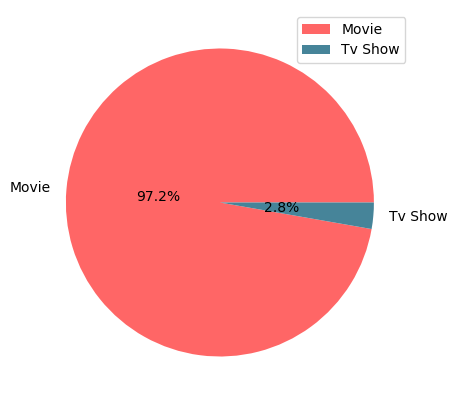

In [14]:
plt.figure(figsize=(5,5))
plt.pie(tur_adları,autopct='%1.1f%%',labels=["Movie","Tv Show"],pctdistance=0.4,colors=['#ff6666', '#468499'])
plt.legend()

# 2010 ÖNCESİ / SONRASI

In [15]:
def cikistarihi(x):
    if x > 2010:
        return "2010'DAN YENİ"
    
    elif x <2010 : 
        return "2010'DAN ESKİ"
   

In [16]:
netflix_df["cikis_tarihi"].max()

2021

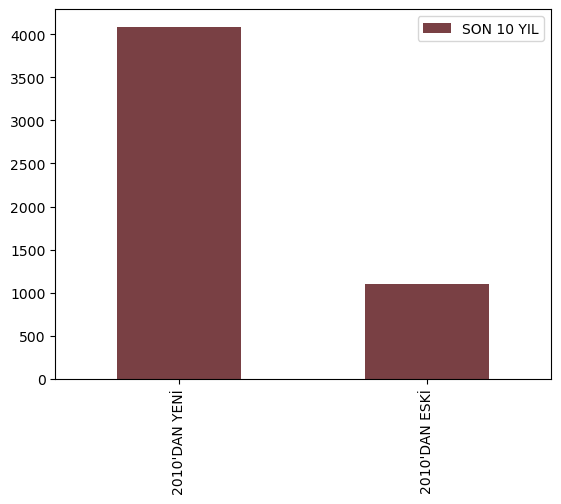

In [17]:
netflix_df["son10"] = netflix_df.cikis_tarihi.apply(cikistarihi)
netflix_df.son10.value_counts().plot.bar(color=('#794044'),label="SON 10 YIL")
plt.legend()

# BİRİNCİL ÜLKELERİ AYIRMAK VE 
# EN FAZLA DİZİ/FİLM ÇIKARAN ÜLKEYİ BULMAK



ÖNEMLİ : EĞER Kİ NaN İÇEREN BİR DEĞER VARSA .APPLY VE SPLİT() FONKSİYONU AŞAĞIDAKİ HATAYI VERİR. 

    #float' object has no attribute 'split' python

In [18]:
netflix_df['birincil_ülke']= netflix_df["ulke"].apply(lambda i: i.split(",")[0])
# ÜLKE'DE YER ALAN KALABALIK METİNLERİ SADELEŞTİRDİK.İLK İNDEX'TE YER ALAN DEĞERİ ALDIK.BİRİNCİL ÜLKE OLARAK YENİ COLUMN

<Axes: >

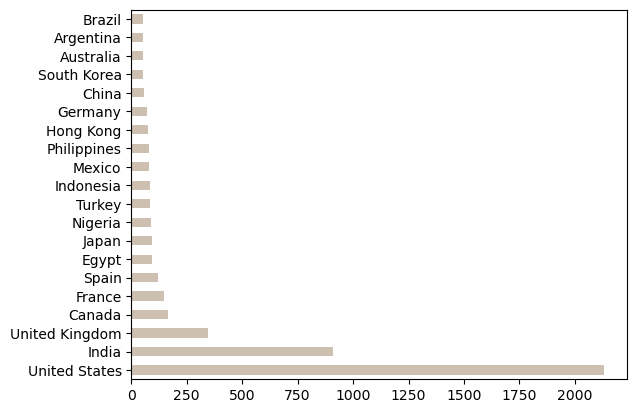

In [19]:
netflix_df.birincil_ülke.value_counts().head(20).plot.barh(color="#cdc0b0")
#BİRİNCİL ÜLKELERİ MAKSİMUM SIRALAMAYA GÖRE GÖRSELLEŞTİRDİK.

ÇIKARILAN SONUCA GÖRE EN ÇOK TV SHOW VEYA FİLM ,AÇIK ARA FARKLA US, SONRA INDIA, SONRA DA UK'DAN ÇIKMAKTADIR.

# REYTİNG ORANLARI


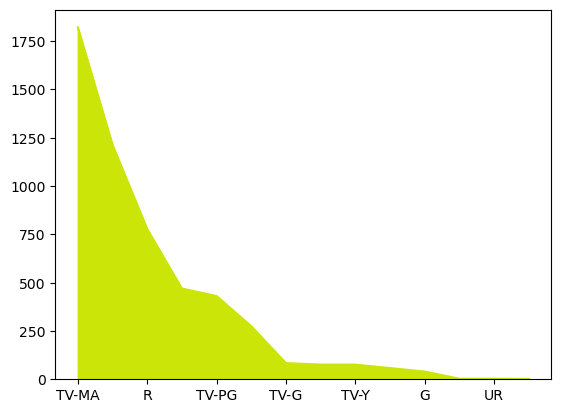

In [20]:
tv_reyting= netflix_df["reyting"].value_counts().plot.area(color="#cbe509")



# EN ÇOK İZLNENEN 10 KATEGORİ

In [21]:
netflix_df.kategori.value_counts().index
netflix_df.kategori.value_counts()

Dramas, International Movies                               336
Stand-Up Comedy                                            286
Comedies, Dramas, International Movies                     257
Dramas, Independent Movies, International Movies           243
Children & Family Movies, Comedies                         179
                                                          ... 
Comedies, Documentaries                                      1
International TV Shows, Romantic TV Shows, TV Mysteries      1
Horror Movies, International Movies, Sci-Fi & Fantasy        1
Reality TV                                                   1
Cult Movies, Dramas, Thrillers                               1
Name: kategori, Length: 335, dtype: int64

<Axes: >

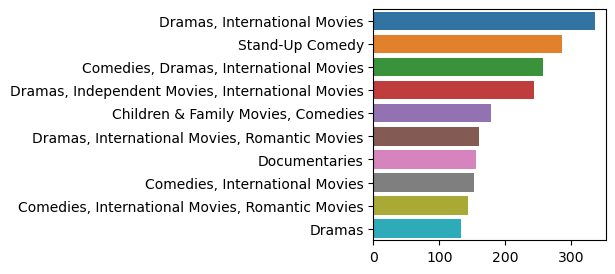

In [22]:
plt.figure(figsize=(3,3))
sbn.barplot(y=netflix_df.kategori.value_counts().head(10).index , 
            x=netflix_df.kategori.value_counts().head(10).values)

# YILLARA GÖRE FİLM ANALİZİ

Öncelikle Movie olan türler üzerinden yeni bir data yaratılır.(netflix_movie)

In [76]:
netflix_movie =netflix_df[netflix_df["tur"]=="Movie"]
netflix_movie.head(2)

,show_id,tur,baslik,direktor,cast,ulke,son_yayin_tarihi,cikis_tarihi,reyting,sure,kategori,aciklama,son10,birincil_ülke
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2010'DAN ESKİ,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2010'DAN YENİ,United States


Data üzerinde yalnızca "Movie" olanlar üzerinden yeni bir data (netflix_movie) yaratıldıktan sonra çıkış tarihleri baz alınarak grafik oluşturulur.

Bu grafikte değerler sıralanır ve ilk 15 değer görüntülenir.

(Text(0.5, 0, 'Movie Sayıları'),
 Text(0, 0.5, 'Yıllar'),
 Text(0.5, 1.0, 'Yıllara Göre Movie Sayısı'))

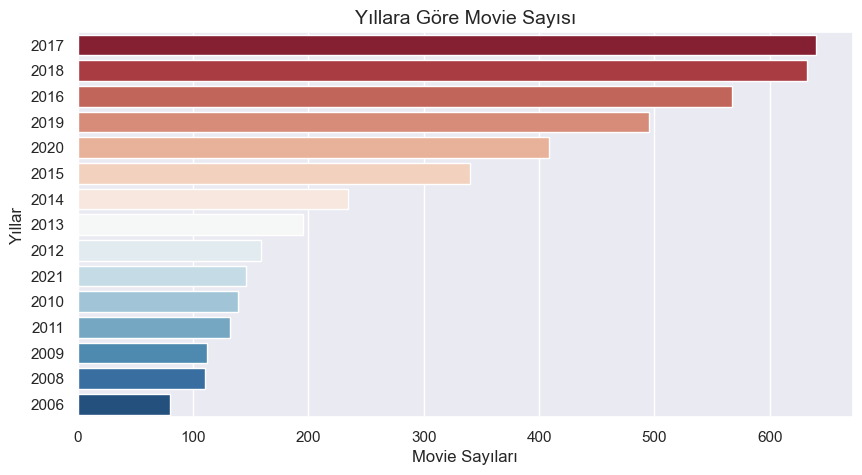

In [115]:
plt.figure(figsize=(10,5))
sbn.set_theme()
sbn.countplot(y="cikis_tarihi",data=netflix_movie , order=netflix_movie["cikis_tarihi"].value_counts().index[0:15],palette="RdBu")
plt.xlabel("Movie Sayıları") , plt.ylabel("Yıllar") , plt.title("Yıllara Göre Movie Sayısı",fontsize=14)

Bu grafikten çıkan sonuca göre en fazla film 2017 yılında yayınlanmıştır.

# TV SHOW'LARIN SEZON SÜRESİ

In [127]:
netflix_TvShows = netflix_df[netflix_df["tur"]=="TV Show"]
netflix_TvShows.head(1)

,show_id,tur,baslik,direktor,cast,ulke,son_yayin_tarihi,cikis_tarihi,reyting,sure,kategori,aciklama,son10,birincil_ülke
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2010'DAN YENİ,United Kingdom


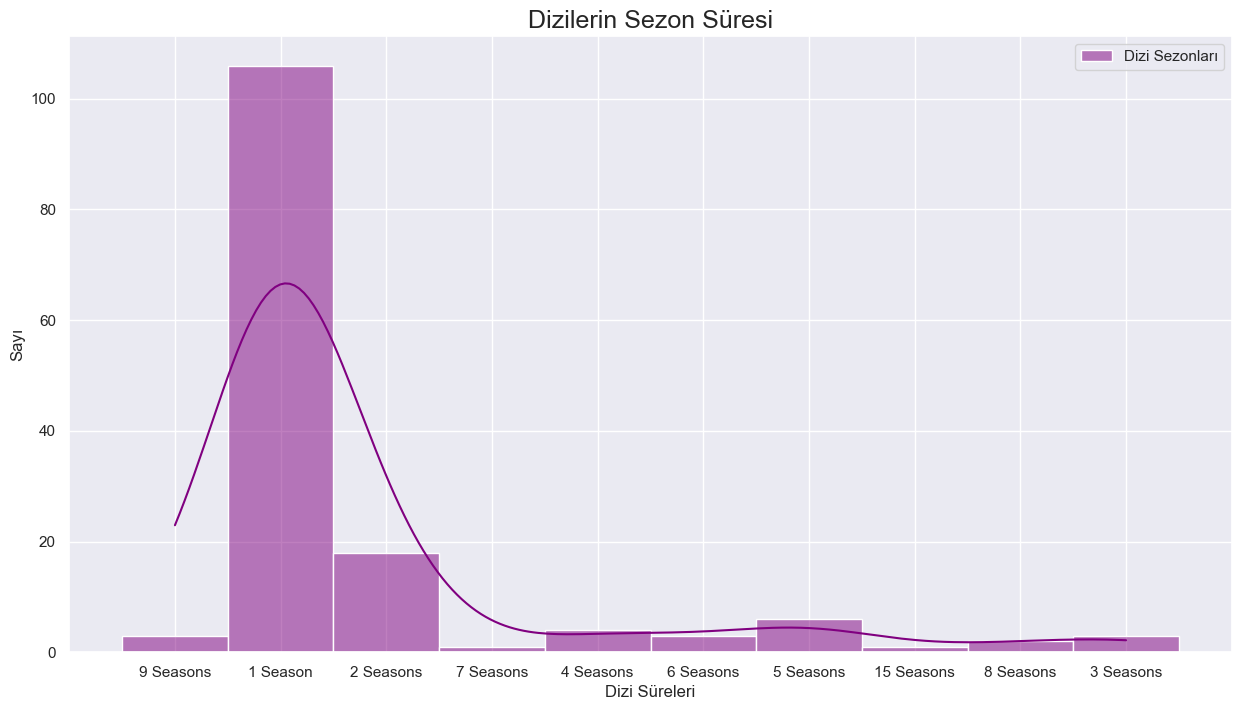

In [159]:
plt.figure(figsize=(15,8))
sbn.histplot(netflix_TvShows["sure"],kde="False",color="purple",label="Dizi Sezonları",)
plt.xlabel("Dizi Süreleri"), plt.ylabel("Sayı"),plt.title("Dizilerin Sezon Süresi",fontsize=18)
plt.legend()